# Analysis of the embeddings 


An embedding is a sequence of numbers that represents the concepts within content such as natural language or code. Embeddings make it easy for machine learning models and other algorithms to understand the relationships between content and to perform tasks like clustering or retrieval. 

In [38]:
# Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from openai import OpenAI
from sklearn.decomposition import PCA

In [39]:
# Define the embedding model
EMBEDDING_MODEL = "text-embedding-3-large"

## 1. Exploratory Data Analysis

In [40]:
# Import the data
df = pd.read_csv("data.csv", sep=";")
df.head(3)

,categorie,question,reponse
0,Python,Qu'est-ce que Python?,Python est un langage de programmation interpr...
1,Python,Pourquoi les développeurs utilisent-ils Python...,Les développeurs utilisent souvent Python pour...
2,Python,Quels sont les avantages de la syntaxe de Pyth...,La syntaxe claire et concise de Python en fait...


In [41]:
# Get the list of categories
categories = sorted(df["categorie"].unique())
categories

['Animaux', 'Python']

In [42]:
# Function to create the embeddings
client = OpenAI()

def get_embeddings(text, model=EMBEDDING_MODEL):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], 
model=model).data[0].embedding

In [43]:
# Save embeddings for each question
qstion_embeddings = []
for question in df["question"]:
    # Get the embeddings
    embedding = get_embeddings(question, model=EMBEDDING_MODEL)
    qstion_embeddings.append(embedding)
    """
    print(question)
    print(embedding)
    print("\n")
    """
df["question_embedding"] = qstion_embeddings

# Get the dimension of the embeddings
df["embedding_dim"] = df["question_embedding"].apply(lambda x: len(x))

# Get the norm of the embeddings
df["embedding_norm"] = df["question_embedding"].apply(lambda x: np.linalg.norm(x))
df.head(3)

,categorie,question,reponse,question_embedding,embedding_dim,embedding_norm
0,Python,Qu'est-ce que Python?,Python est un langage de programmation interpr...,"[-0.025907540693879128, -0.006616642698645592,...",3072,1.0
1,Python,Pourquoi les développeurs utilisent-ils Python...,Les développeurs utilisent souvent Python pour...,"[-0.018787460401654243, -0.021715596318244934,...",3072,1.0
2,Python,Quels sont les avantages de la syntaxe de Pyth...,La syntaxe claire et concise de Python en fait...,"[0.005018328316509724, 0.004179577808827162, -...",3072,1.0


In [44]:
# Reduce the dimension of the embeddings with PCA
pca_embeddings = PCA(n_components=3).fit_transform(qstion_embeddings)
df["question_embedding_pca"] = list(pca_embeddings)

# Get the dimension of the embeddings
df["embedding_dim_pca"] = df["question_embedding_pca"].apply(lambda x: len(x))

# Get the norm of the embeddings
df["embedding_norm_pca"] = df["question_embedding_pca"].apply(lambda x: np.linalg.norm(x))
df.head(3)

,categorie,question,reponse,question_embedding,embedding_dim,embedding_norm,question_embedding_pca,embedding_dim_pca,embedding_norm_pca
0,Python,Qu'est-ce que Python?,Python est un langage de programmation interpr...,"[-0.025907540693879128, -0.006616642698645592,...",3072,1.0,"[-0.3203528715619684, 0.06852521970382887, 0.1...",3,0.360870
1,Python,Pourquoi les développeurs utilisent-ils Python...,Les développeurs utilisent souvent Python pour...,"[-0.018787460401654243, -0.021715596318244934,...",3072,1.0,"[-0.4131998879996627, -0.20756300263228442, -0...",3,0.475301
2,Python,Quels sont les avantages de la syntaxe de Pyth...,La syntaxe claire et concise de Python en fait...,"[0.005018328316509724, 0.004179577808827162, -...",3072,1.0,"[-0.34284452769075596, -0.0652170749438687, 0....",3,0.492465


### Embedding Projection Before Dimensionality Reduction

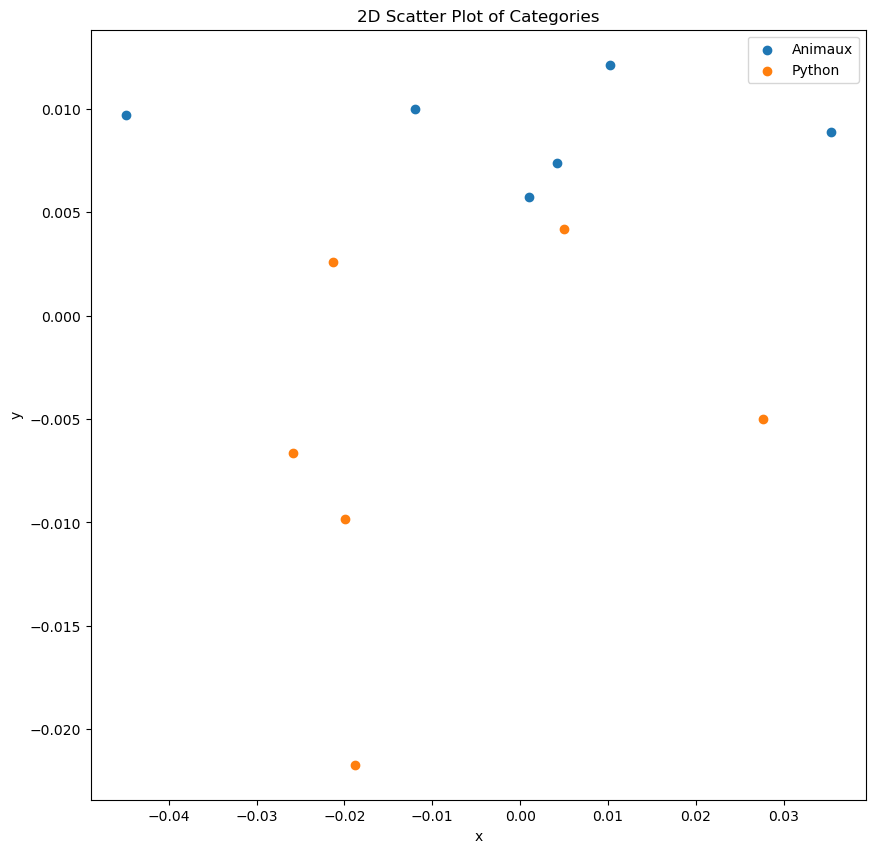

In [45]:
# Display the 2D scatter plot of Categories using Matplotlib
fig = plt.figure(figsize=(10, 10))

for category in categories:
    plt.scatter(df[df["categorie"] == category]["question_embedding"].apply(lambda x: x[0]), 
                df[df["categorie"] == category]["question_embedding"].apply(lambda x: x[1]), 
                label=category)
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Scatter Plot of Categories")
plt.legend()
plt.show()

In [46]:
# Display the 2D scatter plot of Categories using Plotly
fig = go.Figure()

for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["categorie"] == cat]["question_embedding"].to_list())
    x = sub_matrix[:, 0] # first dimension of the embeddings
    y = sub_matrix[:, 1] # second dimension of the embeddings

    # get the question text for hover
    hover_text = df[df["categorie"] == cat]["question"]

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode="markers",
            marker=dict(size=8, color=i, colorscale="Viridis", opacity=0.8),
            name=cat,
            hovertext=hover_text,
            hoverinfo="text",
        )
    )

fig.update_layout(
    autosize=False,
    title="2D Scatter Plot of Categories",
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=10),
    xaxis=dict(title="x"),
    yaxis=dict(title="y"),
)

fig.show()

In [47]:
# Display the 3D Scatter Plot of Categories
fig = go.Figure()

for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["categorie"] == cat]["question_embedding"].to_list())
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]

    # get the question text for hover
    hover_text = df[df["categorie"] == cat]["question"]

    fig.add_trace(
        go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode="markers",
            marker=dict(size=5, color=i, colorscale="Viridis", opacity=0.8),
            name=cat,
            hovertext=hover_text,
            hoverinfo="text",
        )
    )

fig.update_layout(
    autosize=False,
    title="3D Scatter Plot of Categories",
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=10),
    scene=dict(
        xaxis=dict(title="x"),
        yaxis=dict(title="y"),
        zaxis=dict(title="z"),
    ),
)

fig.show()

### Embedding Projection After Dimensionality Reduction

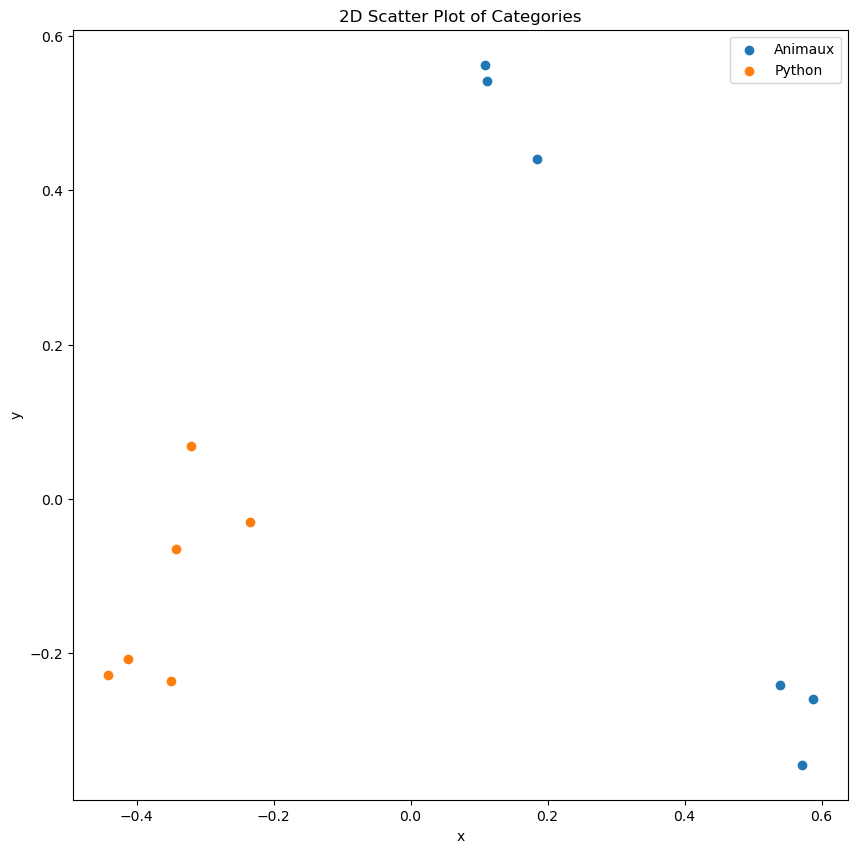

In [48]:
# Display the 2D scatter plot of Categories using Matplotlib
fig = plt.figure(figsize=(10, 10))

for category in categories:
    plt.scatter(df[df["categorie"] == category]["question_embedding_pca"].apply(lambda x: x[0]), 
                df[df["categorie"] == category]["question_embedding_pca"].apply(lambda x: x[1]), 
                label=category)
    
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Scatter Plot of Categories")
plt.legend()
plt.show()

In [49]:
# Display the 2D scatter plot of Categories using Plotly
fig = go.Figure()

for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["categorie"] == cat]["question_embedding_pca"].to_list())
    x = sub_matrix[:, 0] # first dimension of the embeddings
    y = sub_matrix[:, 1] # second dimension of the embeddings

    # get the question text for hover
    hover_text = df[df["categorie"] == cat]["question"]

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode="markers",
            marker=dict(size=8, color=i, colorscale="Viridis", opacity=0.8),
            name=cat,
            hovertext=hover_text,
            hoverinfo="text",
        )
    )

fig.update_layout(
    autosize=False,
    title="2D Scatter Plot of Categories",
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=10),
    xaxis=dict(title="x"),
    yaxis=dict(title="y"),
)

fig.show()

In [50]:
# Display the 3D Scatter Plot of Categories
fig = go.Figure()

for i, cat in enumerate(categories):
    sub_matrix = np.array(df[df["categorie"] == cat]["question_embedding_pca"].to_list())
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]

    # get the question text for hover
    hover_text = df[df["categorie"] == cat]["question"]

    fig.add_trace(
        go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode="markers",
            marker=dict(size=5, color=i, colorscale="Viridis", opacity=0.8),
            name=cat,
            hovertext=hover_text,
            hoverinfo="text",
        )
    )

fig.update_layout(
    autosize=False,
    title="3D Scatter Plot of Categories",
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=10),
    scene=dict(
        xaxis=dict(title="x"),
        yaxis=dict(title="y"),
        zaxis=dict(title="z"),
    ),
)

fig.show()

## 2. Application in the chroma database

In [51]:
# Define some data examples
python_data = [
    "Python est un langage de programmation interprété, dynamique et polyvalent",   
    "Les développeurs utilisent souvent Python pour l'analyse de données en raison de ses bibliothèques robustes comme Pandas et NumPy.",
    "La syntaxe claire et concise de Python en fait un excellent choix pour les débutants en programmation.",
    "Python est un langage polyvalent, utilisé dans des domaines allant du développement de jeux à l'automatisation des tâches système.",
    "Les grandes entreprises telles que Google, Facebook et Netflix font largement usage de Python dans leur infrastructure logicielle.",
    "Les listes en Python sont des structures de données flexibles et polyvalentes, permettant de stocker et de manipuler des collections d'éléments"
]

animal_data = [
    "Le python royal est une espèce de serpent non venimeux originaire d'Afrique.",
    "Les pandas géants sont célèbres pour leur pelage noir et blanc distinctif.",
    "Les pythons peuvent avaler des proies entières grâce à leur mâchoire extensible.",
    "Les pandas roux, bien que moins connus que les pandas géants, sont également des créatures adorables.",
    "Les pandas passent la majeure partie de leur journée à manger du bambou.",
    "Certains pythons peuvent atteindre des longueurs impressionnantes, dépassant souvent les 6 mètres."
]

In [52]:
# Define a fonction to get answers from the chatbot
def get_answers():
    pass

In [53]:
# Create a csv file with the categorie, question and answer for each questions
def create_csv_file():
    pass